# Exercise Notes

## Ex1.
A = [[0.3, 0.6, 0.1], [0.5, 0.2, 0.3], [0.4, 0.1, 0.5]]

v = [1 / 3, 1 / 3, 1 / 3]

You can also initialize v to be random positive numbers just needs to sum to 1
Do this loop

do 25 times:

    v' = vA
    v = v'

- By the 25the step you've calculated original v times A^25
- On each step, plot the Euclidean distance between |v' - v| as a function of iteration
- You should notice that it converges to 0
- As a quiz, this about what we've just found (in terms of linear algebra)


v times A ** 25 equals: 
[[  2.82429536e-14   9.47676268e-07   3.33333333e-26]
 [  9.93410746e-09   1.11848107e-18   2.82429536e-14]
 [  3.75299969e-11   3.33333333e-26   9.93410746e-09]]

v equals: 
[[  2.82429536e-14   9.47676268e-07   3.33333333e-26]
 [  9.93410746e-09   1.11848107e-18   2.82429536e-14]
 [  3.75299969e-11   3.33333333e-26   9.93410746e-09]]


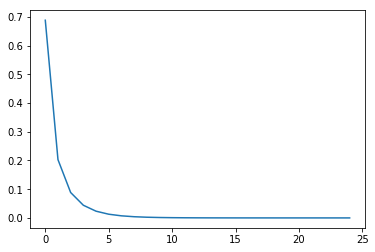

In [1]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([[0.3, 0.6, 0.1], [0.5, 0.2, 0.3], [0.4, 0.1, 0.5]])
v = np.array([1 / 3, 1 / 3, 1 / 3])

print('\nv times A ** 25 equals: \n{0}'.format(v * (A ** 25)))

eu_plot = []
for i in range(25):
    v_prime = v * A
    # Finding euclidean distance between v' and v
    eu_plot.append(np.linalg.norm(v_prime - v))
    v = v_prime

print('\nv equals: \n{0}'.format(v))

plt.plot(eu_plot)
plt.show()

## Ex2.

Demonstrate the central limit theorem (CLT)

Recall:

    If Y = X1 + X2 + X3 + ... + XN
    
    where X are IID (independent, identically distributed)
    
    Then as N -> infinity, Y -> Gaussian distribution

- Use the uniform distribution as your base for X
- Use N = 1000 (or higher if you want)
- Then draw 1000 Y's (or more if you want)
- Plot histogram of Y's -> should be a "bell curve"
- Bonus: find the expected mean and variance of Y

The mean of gaussian distribution is: 500.00047788137874
The variance of gaussian distribution is: 84.27069696323848
The standard deviation of gaussian distribution is: 9.17990724153782


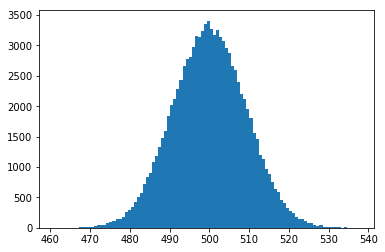

In [2]:
import numpy as np
import matplotlib.pyplot as plt

N = 100000
draw_Y = 1000
uniform = np.random.rand(N, draw_Y)
Y = np.sum(uniform, axis=1)

print('The mean of gaussian distribution is: {0}'.format(Y.mean()))
print('The variance of gaussian distribution is: {0}'.format(Y.var()))
print('The standard deviation of gaussian distribution is: {0}'.format(Y.std()))

plt.hist(Y, bins=100)
plt.show()

## Ex3.

Load in the MNIST dataset, and plot the mean (average) image for each digit class (0....9)

Recall: mean = sum / number of elements

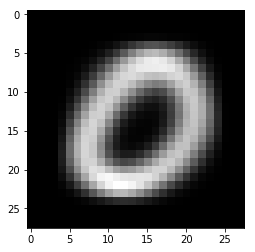

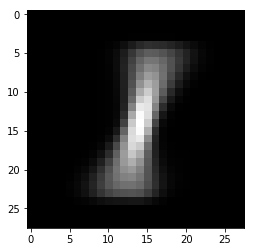

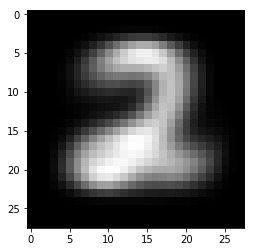

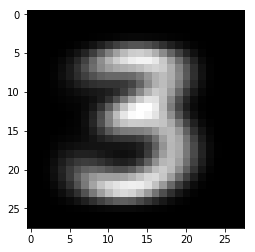

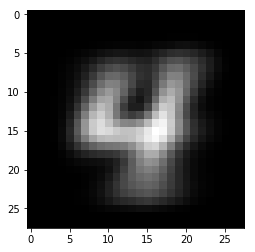

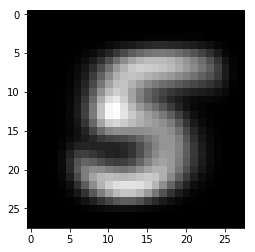

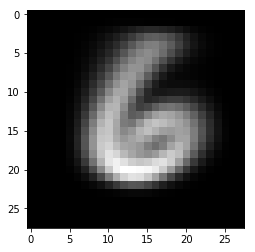

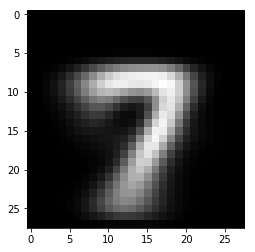

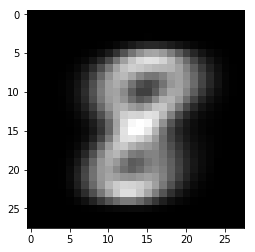

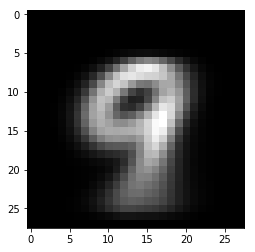

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# MNIST data-set downloaded form https://www.kaggle.com/c/digit-recognizer/data
mnist_df = pd.read_csv('../large_files/train.csv')

digits = []
for i in range(10):
    # Below statement filters the rows from the mnist dataframe based on the label and then using loc,
    # filters the columns such that result does not contain label column and then converts it
    # to numpy array
    # https://stackoverflow.com/questions/29763620/how-to-select-all-columns-except-one-column-in-pandas
    digits.append(mnist_df[mnist_df['label'] == i].loc[:, mnist_df.columns != 'label'].as_matrix())

for i in range(10):
    #Below statement sums the pixes intensities along 0th axis and then divides the valus with number of records to find the mean pixes intensity , thus resizing to 28 by 28 we get mean image
    plt.imshow((np.sum(digits[i], axis=0) / digits[i].shape[0]).reshape(28, 28), cmap='gray')  # setting colormap to gray
    plt.show()

## Ex4.

- Continue to work with the MNIST dataset
- Common C programming exercise (with for loops and array indexing)
- Write a function that flips an image 90 degrees clockwise
- Try both the "for loop method" and by making use of Numpy functions

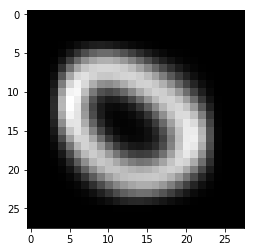

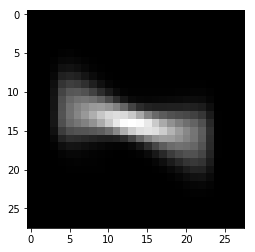

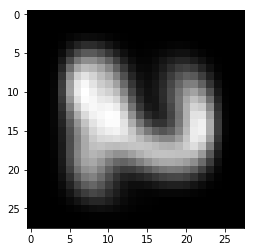

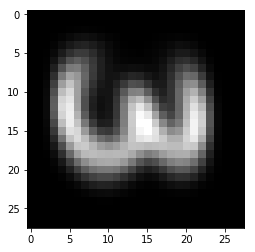

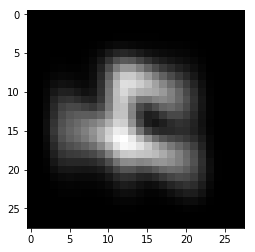

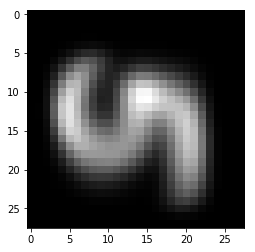

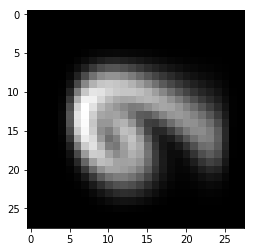

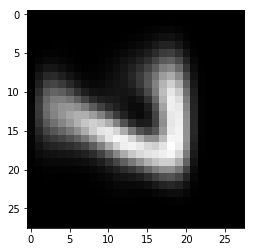

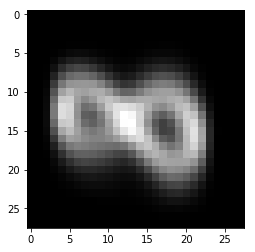

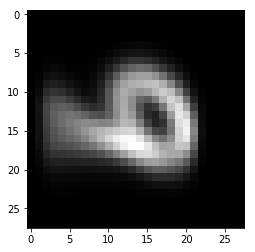

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# MNIST data-set downloaded form https://www.kaggle.com/c/digit-recognizer/data
mnist_df = pd.read_csv('../large_files/train.csv')

# As found in ex3.py

digits = []
for i in range(10):
    # Below statement filters the rows from the mnist dataframe based on the label and then using loc,
    # filters the columns such that result does not contain label column and then converts it
    # to numpy array
    # https://stackoverflow.com/questions/29763620/how-to-select-all-columns-except-one-column-in-pandas
    digits.append(mnist_df[mnist_df['label'] == i].loc[:, mnist_df.columns != 'label'].as_matrix())

for i in range(10):
    #Below statement sums the pixes intensities along 0th axis and then divides the valus with number of records to find the mean pixes intensity , thus resizing to 28 by 28 we get mean image and then rotating it by 90 degrees clockwise with k = -1
    plt.imshow(np.rot90((np.sum(digits[i], axis=0) / digits[i].shape[0]).reshape(28, 28), k=-1), cmap='gray')  # setting colormap to gray
    plt.show()

## Ex5.

Write a function that tests whether or not a matrix is symmetric, i.e.

def is_symmetric(matrix):

    .....

Try both ways: the "manual way" (i.e. by using the definition) and by making use of Numpy functions

In [5]:
import numpy as np

# Matrix A is called symmetric matrix if A = A_transpose

def is_symmetric(matrix):
    # In order to compare the two matrices use np.allclose instead of (if matrix == np.transpose(matrix):)
    # References:
    # https://stackoverflow.com/questions/42908334/checking-if-a-matrix-is-symmetric-in-numpy
    # https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.allclose.html
    # https://en.wikipedia.org/wiki/Symmetric_matrix

    try:

        if np.allclose(matrix, np.transpose(matrix)):  # or if np.allclose(matrix, matrix.T):
            return True
    except ValueError as err:
        print("ValueError: {0}".format(err))
    return False

A = np.array([
    [7, 1, 3],
    [1, 0, 2],
    [3, 2, 5]
])

print(is_symmetric(A))

A = np.array([
    [7, 1, 3],
    [2, 0, 2],
    [3, 1, 5]
])

print(is_symmetric(A))

A = np.array([
    [7, 1, 3],
    [2, 0, 2],
    [3, 1, 5],
    [3, 1, 5]
])

print(is_symmetric(A))

True
False
ValueError: operands could not be broadcast together with shapes (4,3) (3,4) 
False


## Ex6.

Generate and plot this dataset (XOR)

Recall:

    0 XOR 0 = 0
    0 XOR 1 = 1
    1 XOR 0 = 1
    1 XOR 1 = 0

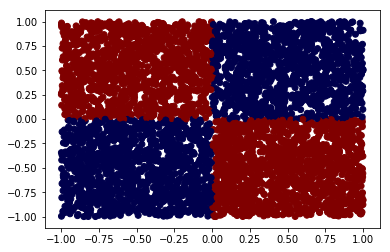

In [7]:
import numpy as np
import matplotlib.pyplot as plt

data_set_x_y = np.random.randint(low=0, high=2, size=(5000, 2))

# https://stackoverflow.com/questions/14562991/python-equivalent-of-sum-using-xor
xor_labels = list(map(lambda a, b: a ^ b, data_set_x_y[:, 0], data_set_x_y[:, 1]))

# noise = np.random.uniform(low=-1.0, high=0, size=5000)
x = data_set_x_y[:, 0] + np.random.uniform(low=-1.0, high=0, size=5000)
y = data_set_x_y[:, 1] + np.random.uniform(low=-1.0, high=0, size=5000)

# https://stackoverflow.com/questions/43090817/matplotlib-scatter-plot-change-color-based-on-value-on-list
plt.scatter(x, y, c=xor_labels, cmap='seismic', marker='o')
plt.show()

## Ex7.

Generate and plot this dataset (donuts/ concentric circles)

[As found on https://nbviewer.jupyter.org/github/woo-chia-wei/python-visualization/blob/master/dataset_in_different_shapes.ipynb]

The code uses following numpy methods:
* https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.interp.html
* https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.column_stack.html
* https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.vstack.html
* https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.concatenate.html

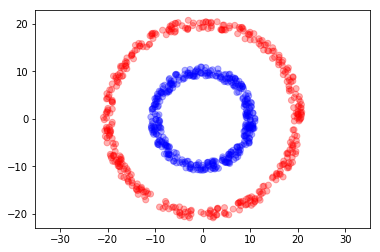

[[  9.88059633  -1.92567179   0.        ]
 [-15.34651779 -12.12057385   1.        ]
 [  6.36696687   7.10714471   0.        ]
 [  6.18622849   8.28653699   0.        ]
 [-16.17604407  11.14561447   1.        ]
 [ -5.78829802  -8.32535074   0.        ]
 [  8.89132562  16.83228634   1.        ]
 [-10.67738334  17.79398051   1.        ]
 [ 15.95280592  11.89613341   1.        ]
 [  1.10046213  18.9765399    1.        ]]


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

################
# Configuration
################
size = 400
delta = 1

##########################
# Create 2D-coordinates
##########################
def donut_data(size, radius, delta):
    radii = np.interp(np.random.rand(size), [0, 1], [radius-delta, radius+delta])
    angles = np.interp(np.random.rand(size), [0, 1], [-np.pi, np.pi])
    return np.column_stack([radii * np.cos(angles), radii * np.sin(angles)]) 

X = np.vstack((donut_data(size, 10, 1),
               donut_data(size, 20, 1)))

#################
# Create labels
#################
Y = np.concatenate((np.repeat(0, size),
                    np.repeat(1, size)))

#########################################################
# Combine X and Y to be training set with shuffled order
#########################################################
training = np.column_stack((X, Y))
np.random.shuffle(training)

#####################
# Create scatterplot
#####################
colors = ['blue', 'red']
plt.scatter(training[:, 0], training[:, 1], c=training[:, 2], alpha=0.3, cmap=ListedColormap(colors))
plt.axis('equal')
plt.show()

##########################
# Print first 10 records
##########################
print(training[:10])

# Ex8.

Generate and plot this dataset (spiral)

One possibility is to parameterize radius and angel, i.e.

* r(t) ~ t
* 0(t) ~ t

[As found on https://nbviewer.jupyter.org/github/woo-chia-wei/python-visualization/blob/master/dataset_in_different_shapes.ipynb]

The code uses following numpy methods:
* https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.interp.html
* https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.column_stack.html
* https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.vstack.html
* https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.concatenate.html

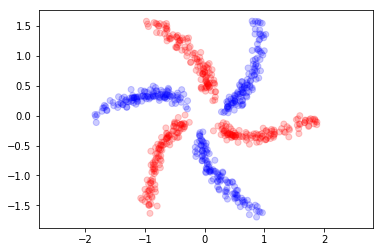

[[-0.42491697 -0.20558887  1.        ]
 [ 0.87957954 -1.52112418  0.        ]
 [-0.70027516 -0.4982507   1.        ]
 [ 0.50332206 -1.39202378  0.        ]
 [ 1.05337928 -0.36491674  1.        ]
 [-0.38498361 -0.13898175  1.        ]
 [-0.64992968 -0.20429482  1.        ]
 [-0.37376354  1.30033172  1.        ]
 [ 0.6364      0.4413324   0.        ]
 [ 0.55795497  0.35543836  0.        ]]


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

################
# Configuration
################
a = 1
b = 1
size = 120
delta = 0.15

##########################
# Create 2D-coordinates
##########################
def spiral_data(a, b, size, delta, rotation):
    
    # Polar coordinates
    angles = np.interp(np.random.rand(size), [0, 1], [np.pi/10, np.pi/3])
    radii = a * np.exp(b * angles) - a
    x = radii * np.cos(angles)
    y = radii * np.sin(angles)
    
    # Create random neighbours
    r = np.interp(np.random.rand(size), [0, 1], [0, delta])
    t = np.interp(np.random.rand(size), [0, 1], [0, np.pi * 2])
    x, y = x + r * np.cos(t), y + r * np.sin(t)
    
    # Rotate all the points
    x, y = x * np.cos(rotation) - y * np.sin(rotation), x * np.sin(rotation) + y * np.cos(rotation)
    return np.column_stack((x, y))

X = np.vstack((spiral_data(a, b, size, delta, np.pi / 3 * 0),
               spiral_data(a, b, size, delta, np.pi / 3 * 2),
               spiral_data(a, b, size, delta, np.pi / 3 * 4),
               spiral_data(a, b, size, delta, np.pi / 3 * 1),
               spiral_data(a, b, size, delta, np.pi / 3 * 3),
               spiral_data(a, b, size, delta, np.pi / 3 * 5)))

#################
# Create labels
#################
Y = np.concatenate((np.repeat(0, size * 3),
                    np.repeat(1, size * 3)))

#########################################################
# Combine X and Y to be training set with shuffled order
#########################################################
training = np.column_stack((X, Y))
np.random.shuffle(training)

#####################
# Create scatterplot
#####################
colors = ['blue', 'red']
plt.scatter(training[:, 0], training[:, 1], c=training[:, 2], alpha=0.2, cmap=ListedColormap(colors))
plt.axis('equal')
plt.show()

##########################
# Print first 10 records
##########################
print(training[:10])

# Ex9.

Hopefully you noticed the last 3 datasets all had the exact same structure:

<table align='left'>
<tr><th>x1</th><th>x2</th><th>y</th></tr>
<tr><td>0.1</td><td>0.3</td><td>0</td></tr>
<tr><td>0.5</td><td>-0.2</td><td>1</td></tr>
<tr><td colspan=3>........</td></tr>
<table>
<br><br><br><br><br>

Take any of the datasets you previously generated, and save it to CSV with these headers, using Pandas
(Use Pandas documentation)

In [11]:
import numpy as np
import pandas as pd

data_set_x_y = np.random.randint(low=0, high=2, size=(5000, 2))

# https://stackoverflow.com/questions/14562991/python-equivalent-of-sum-using-xor
xor_labels = list(map(lambda a, b: a ^ b, data_set_x_y[:, 0], data_set_x_y[:, 1]))

# noise = np.random.uniform(low=-1.0, high=0, size=5000)
x = data_set_x_y[:, 0] + np.random.uniform(low=-1.0, high=0, size=5000)
y = data_set_x_y[:, 1] + np.random.uniform(low=-1.0, high=0, size=5000)

# https://stackoverflow.com/questions/29978241/how-do-i-convert-a-numpy-array-to-pandas-dataframe
df = pd.DataFrame({'x1': x, 'x2': y, 'y': xor_labels})

# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_csv.html#pandas.DataFrame.to_csv
df.to_csv(path_or_buf='ex9_csv.csv', sep='\t', encoding='utf-8', index=False)